In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spamham/spamham.csv


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 


In [3]:
data=pd.read_csv('../input/spamham/spamham.csv')

In [4]:
data.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.groupby('Category').describe().T



Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='count'>

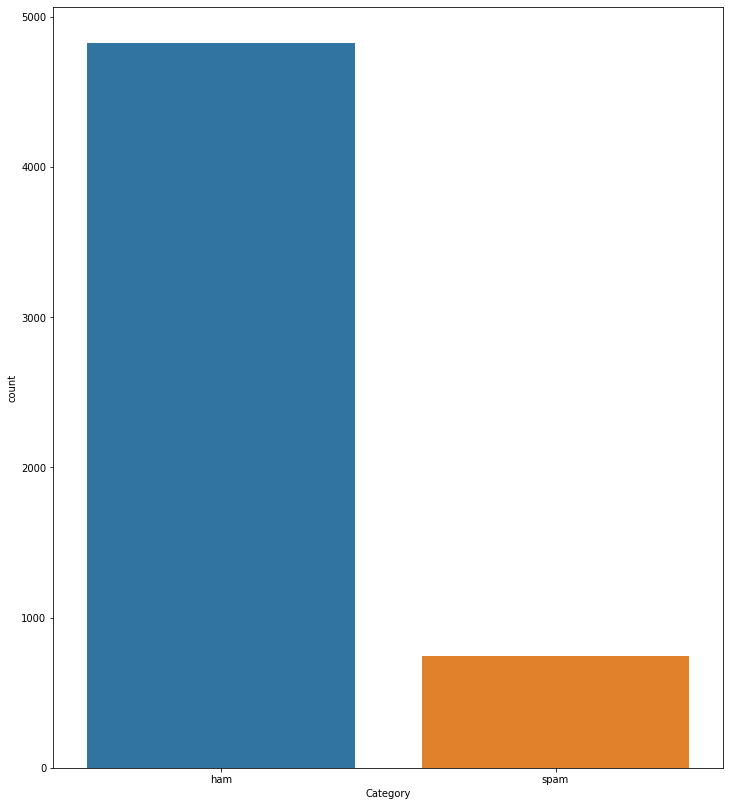

In [6]:
import seaborn as sns
plt.figure(figsize=(12,14))
sns.countplot(data['Category'])

In [7]:
ham_msg = data[data.Category =='ham']
spam_msg = data[data.Category=='spam']

In [8]:
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)

In [9]:
print(ham_msg.shape,spam_msg.shape)



(747, 2) (747, 2)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

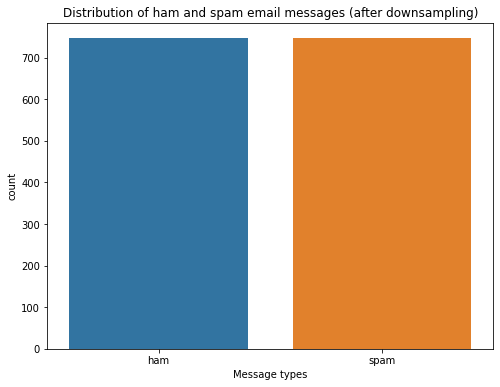

In [10]:
balanced_data=ham_msg.append(spam_msg).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(balanced_data.Category)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')


In [11]:
balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...


In [12]:
balanced_data['label']=balanced_data['Category'].map({'ham':0,'spam':1})


In [13]:
train_msg, test_msg, train_labels, test_labels = train_test_split(balanced_data['Message'],balanced_data['label'],test_size = 0.2,random_state = 434)

In [14]:
vocab_size=500
oov_tok='<OOV>'
max_len=50

In [15]:
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [16]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 '2': 11,
 'and': 12,
 'is': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 '4': 23,
 'me': 24,
 'are': 25,
 'with': 26,
 'from': 27,
 'text': 28,
 'this': 29,
 'my': 30,
 'get': 31,
 'stop': 32,
 'mobile': 33,
 'just': 34,
 'no': 35,
 'it': 36,
 'will': 37,
 'reply': 38,
 'only': 39,
 'be': 40,
 'that': 41,
 'claim': 42,
 'www': 43,
 'not': 44,
 'out': 45,
 'do': 46,
 'send': 47,
 'new': 48,
 'so': 49,
 'our': 50,
 'we': 51,
 'but': 52,
 'at': 53,
 'prize': 54,
 'can': 55,
 'cash': 56,
 'all': 57,
 'if': 58,
 "i'm": 59,
 'who': 60,
 '150p': 61,
 'uk': 62,
 'go': 63,
 '1': 64,
 'nokia': 65,
 'please': 66,
 'win': 67,
 't': 68,
 'tone': 69,
 'won': 70,
 'week': 71,
 'com': 72,
 'msg': 73,
 '50': 74,
 'was': 75,
 'day': 76,
 'up': 77,
 'phone': 78,
 'by': 79,
 'been': 80,
 'what': 81,
 'want': 82,
 'service': 83,
 'know

In [17]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)



In [18]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)


In [19]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                    tf.keras.layers.GlobalAvgPool1D(),
                                    tf.keras.layers.Dense(32,activation='relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(1,activation='sigmoid')])

2022-09-30 21:31:34.841388: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [22]:
epoch = 30 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(Trainning_pad, train_labels, validation_data=(Testing_pad, test_labels),epochs=epoch, callbacks=[early_stop],verbose=2 )

2022-09-30 21:57:55.359127: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/opt/conda/lib/python3.7/site-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


Epoch 1/30
38/38 - 1s - loss: 0.6904 - accuracy: 0.5749 - val_loss: 0.6813 - val_accuracy: 0.8863
Epoch 2/30
38/38 - 0s - loss: 0.6605 - accuracy: 0.8870 - val_loss: 0.6272 - val_accuracy: 0.8963
Epoch 3/30
38/38 - 0s - loss: 0.5825 - accuracy: 0.8996 - val_loss: 0.5216 - val_accuracy: 0.8930
Epoch 4/30
38/38 - 0s - loss: 0.4704 - accuracy: 0.9013 - val_loss: 0.4019 - val_accuracy: 0.8930
Epoch 5/30
38/38 - 0s - loss: 0.3590 - accuracy: 0.9096 - val_loss: 0.3119 - val_accuracy: 0.9130
Epoch 6/30
38/38 - 0s - loss: 0.2836 - accuracy: 0.9180 - val_loss: 0.2489 - val_accuracy: 0.9298
Epoch 7/30
38/38 - 0s - loss: 0.2343 - accuracy: 0.9356 - val_loss: 0.2085 - val_accuracy: 0.9431
Epoch 8/30
38/38 - 0s - loss: 0.1976 - accuracy: 0.9456 - val_loss: 0.1798 - val_accuracy: 0.9498
Epoch 9/30
38/38 - 0s - loss: 0.1694 - accuracy: 0.9556 - val_loss: 0.1561 - val_accuracy: 0.9532
Epoch 10/30
38/38 - 0s - loss: 0.1474 - accuracy: 0.9540 - val_loss: 0.1399 - val_accuracy: 0.9565
Epoch 11/30
38/38 -

In [23]:
model.evaluate(Testing_pad, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9699


[0.07290717959403992, 0.9698996543884277]

Text(0.5, 0, 'epoch')

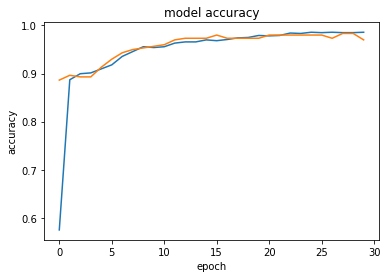

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [26]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]



In [27]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
predict_spam(predict_msg)

array([[0.00286427],
       [0.00882828],
       [0.99995613]], dtype=float32)